# Import Some Libraries

In [1]:

import pandas as pd
import numpy as np

#libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import bottleneck as bn

import seaborn as sns

import plotly

import cufflinks as cf
cf.set_config_file(sharing='public',theme='pearl',offline=True)

import plotly.express as px

In [24]:
!pip install numpy==1.23.0

  Using cached numpy-1.23.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.2 kB)
Using cached numpy-1.23.0-cp39-cp39-macosx_11_0_arm64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [23]:
!pip install pandas==1.5.3

  Using cached pandas-1.5.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp39-cp39-macosx_11_0_arm64.whl (11.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


#  1: Single Stock Model

## Brownian Motion Model 
## Log of Changes in Stock Prices are Normally (Gaussian) Distributed

### x[n] = x[0] * (1+p[1]) * (1+p[2)) * ... * (1+p[n])

### x[n] = x[0] * d[1] * d[2] *...*d[n]

### log(x[n]) = log(x[0]) + log(d[1]) + log(d[2]) + ... + log(d[n])

### xL[n] = xL[0] + xL_d[1]  + xL_d[2] + .... + xL_d[n]

### where xL_d[n] is a Gaussian (Normal) Random Variable with mean mu and standard deviation sigma

<function matplotlib.pyplot.show(close=None, block=None)>

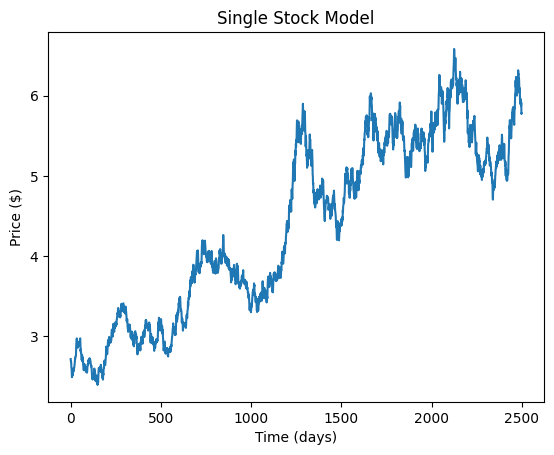

In [2]:
#EXERCISE: Simulate a single stock using daily price movements.

#1) Generate a random vector xL_d[..] of length N (for N days) with mean mu and std sigma. 
#This is the daily log change in stock prices
def stock_simulator(mu,sigma,N):
    xL_d = np.random.normal(mu,sigma,N)
    #2) Assume xL[0] = 1
    xL = np.zeros(N)
    x = np.zeros(N)
    xL_d[0] = 0
    xL[0] = 1
    x[0] = 2.718281828

    #3) Use equations above to compute the vectors 
    #xL[n], n = 0:N
    #x[n], n = 0:N
    #x[n] is your simulated stock price.
    for n in range(1,N):
        xL[n] = xL[n-1] + xL_d[n]
        x[n] = x[n-1] * np.exp(xL_d[n])
    #x = np.exp(xL)

    #4) Plot x[n] for various choices of mu and sigma
    return x

#stock_prices = stock_simulator(0.00000005,0.05,2500)
mu = 0.000279
sigma  = 0.012283
single_stock_prices = stock_simulator(mu, sigma, 2500)

plt.figure()
plt.plot(single_stock_prices)
plt.title('Single Stock Model')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.show



In [3]:
#EXERCISE: Calculate the Sample Mean/Std from the Daily Log Change in Stock Prices + Compare 

#1) Generate a random vector xL_d[..] of length N (for N days) with mean mu and std sigma. 
#This is the daily log change in stock prices
def stock_simulator_v2(mu,sigma,N):
    xL_d = np.random.normal(mu,sigma,N)
    #2) Assume xL[0] = 1
    xL = np.zeros(N)
    x = np.zeros(N)
    xL_d[0] = 0
    xL[0] = 1
    return xL_d

# Assign values for mu & sigma then call the function
mu = 0.000279
sigma  = 0.012283
log_change = stock_simulator_v2(mu, sigma, 2500)


In [4]:
#2) Create DataFrame for array
#num_of_days = range(len(log_change))
lc = pd.DataFrame({'Log Change': log_change })

# Calculate the sample 
def mean_std_calculator(n) :
    sample = lc['Log Change'].sample(n)
    m_new = sample.mean()
    s_new = sample.std()
    return m_new,s_new
print(mean_std_calculator(10))


(-0.0029385038319946688, 0.009219507312571318)


<function matplotlib.pyplot.show(close=None, block=None)>

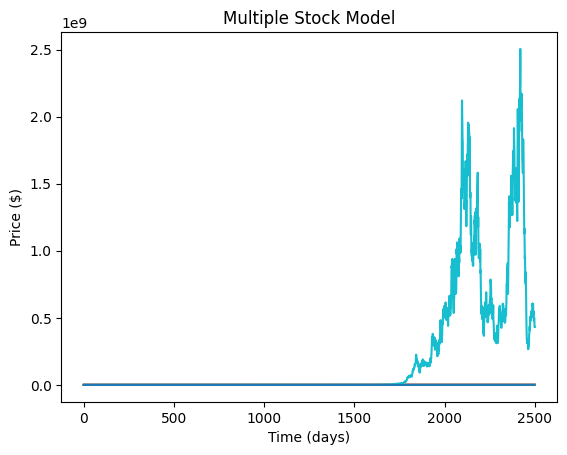

In [5]:
# Multiple Stock Model

#1) Define variables needed, including the sectors that you want to inspect
N = 2500
# Each sector-variable should be comprised of the mu/sigma of the normal distribution 
# of the log change in stock prices and N days 
SPY = [0.000279,0.012283,N] 
XLE = [0.000285,0.018462,N]
A = [0.000988,0.0199,N]
B = [0.000099,0.0201,N]
C = [0.000222,0.0111,N]
D = [0.000263,0.0156,N]
E = [0.000280,0.0123,N]
F = [0.00199,0.0100,N]
G = [0.00259,0.0117,N]
H = [0.01000,0.0887,N]
I = [0.000284,0.0181,N]

#2) Create dictionaries to house these variables, one for the inputs and one for the stock price outputs
sectors = {"SPY":SPY,"XLE":XLE, 'A':A,'B':B,'C':C,'D':D,'E':E,'F':F,'G':G,'H':H,'I':I}

stocks = {}

#3) Calculate the vector log of the stock price and the vector stock price for each entry in sectors
for sector_name, sector_values in sectors.items(): 
    xL_d = np.random.normal(sector_values[0],sector_values[1],N)
    xL = np.zeros(N)
    x = np.zeros(N)
    xL_d[0] = 0
    xL[0] = 1
    x[0] = 2.718281828
    
    for n in range(1,N):
        xL[n] = xL[n-1] + xL_d[n]
        x[n] = x[n-1] * np.exp(xL_d[n])
        
    stocks[sector_name] = x
    
#4) Put the output dictionary into a DataFrame
multiple_stock_prices = pd.DataFrame(stocks)
plt.figure()
plt.plot(multiple_stock_prices)
plt.title('Multiple Stock Model')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.show

## Load Single Stock Price

In [ ]:
from app.dashapp.qmldash.qml_utils import *
from quantum_ml.strategies import *

In [ ]:
cassandra_session = get_cassandra_session()

In [3]:

# #read the 11 S&P sector symbols
sectors = ['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XTL', 'XLU', 'XLK', 'XLRE']
# provider = 'QUANDL_EOD'

# closes = {}
# for sector in sectors:
#     try:
#         target_var, provider = sector, provider
#         closep, closep_raw, closep_ohlc = get_closep(cassandra_session, target_var, provider)
#         #closep_raw[datetime(2021,1,1):].plot()
#         closes[target_var] = closep_raw['close']
#     except Exception as e:
#         print('error', sector, e)
# df_close = pd.DataFrame(closes)
df_close = pd.read_csv('close_prices.csv', index_col = 0, parse_dates = True)
## calculate log gain for each sector in close_prices dataframe
#convert price from linear to log
df_close_log = df_close.apply(np.log)
df_close_log.index = df_close.index

#convert from log to log gain price
df_close_log_delta = df_close_log.apply(np.diff)
df_close_log_delta.index = df_close.index[1:]
df_close_log_delta.fillna(0, inplace = True)

In [7]:
#this returns a series of size (M,). We need to convert this to an 1xM vector
Mu = df_close_log_delta.mean(axis = 0)

#declare an empty array
Mu_vec = np.zeros((1,len(sectors)))
#assign the means
Mu_vec[0,:] = Mu.values

#print the means
Mu

XLE     0.000283
XLB     0.000278
XLI     0.000297
XLY     0.000336
XLP     0.000280
XLV     0.000306
XLF     0.000197
XTL     0.000097
XLU     0.000274
XLK     0.000277
XLRE    0.000076
dtype: float64

In [8]:
Sigma = df_close_log_delta.cov()
Sigma

,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XTL,XLU,XLK,XLRE
XLE,0.000341,0.000190,0.000163,0.000140,0.000083,0.000105,0.000196,0.000072,0.000112,0.000138,0.000042
XLB,0.000190,0.000226,0.000168,0.000158,0.000085,0.000107,0.000195,0.000069,0.000096,0.000150,0.000042
XLI,0.000163,0.000168,0.000183,0.000158,0.000085,0.000111,0.000197,0.000066,0.000093,0.000162,0.000042
XLY,0.000140,0.000158,0.000158,0.000206,0.000085,0.000112,0.000195,0.000069,0.000088,0.000172,0.000042
XLP,0.000083,0.000085,0.000085,0.000085,0.000092,0.000069,0.000102,0.000036,0.000073,0.000077,0.000031
XLV,0.000105,0.000107,0.000111,0.000112,0.000069,0.000131,0.000132,0.000048,0.000077,0.000125,0.000033
XLF,0.000196,0.000195,0.000197,0.000195,0.000102,0.000132,0.000330,0.000071,0.000112,0.000187,0.000044
XTL,0.000072,0.000069,0.000066,0.000069,0.000036,0.000048,0.000071,0.000101,0.000036,0.000073,0.000041
XLU,0.000112,0.000096,0.000093,0.000088,0.000073,0.000077,0.000112,0.000036,0.000152,0.000091,0.000044
XLK,0.000138,0.000150,0.000162,0.000172,0.000077,0.000125,0.000187,0.000073,0.000091,0.000262,0.000043


In [9]:
# Find the dimensions of the log returns 
N,M = df_close_log_delta.shape

# Simulate uncorrelated random signals with zero mean
Z = np.random.RandomState(1)
Z = Z.rand(N,M)
Z = Z-np.mean(Z, axis = 0)

# Find C using cholesky decomposition
C = np.linalg.cholesky(Sigma)

# Repeat Mu_vec N times along axis=0
tiled_Mu = np.tile(Mu_vec,(N,1))


Y = np.matmul(Z,C.T) + tiled_Mu
Y = pd.DataFrame(Y, index=df_close_log_delta.index)

In [23]:
pip install nbformat==4.2.0

Note: you may need to restart the kernel to use updated packages.


Using daily log returns dataframe we can now begin data analysis 

In [10]:
def new_df(d1):
    df_1 = df_close_log_delta.iloc[-d1:,:]
    return df_1

def mean_plotter(df):
    """
    Plot the yearly mean log returns for each sector.
    
    """
    
    # Calculate annualized mean return
    m = df.mean() * 252
    print(m)
    m_df = m.reset_index()
    m = px.bar(m_df, title=f'Yearly Mean for {df.shape[0]} days', x='index', y=0, labels={'index': 'Sectors', '0': 'Mean Log Gain Price'})
    return m
    
    # Create the plot
#     plt.figure(figsize=(10, 4))
#     plt.bar(df_1.columns, m)
#     plt.title(f'Yearly Mean for {d1} days')
#     plt.xlabel('Sectors')
#     plt.ylabel('Mean Log Gain Price')
#     plt.show()

# Example usage: Plot mean for the last 30 days
mean_plotter(new_df(30))



XLE    -0.185856
XLB    -0.127409
XLI     0.036135
XLY     0.642083
XLP     0.066715
XLV     0.271122
XLF     0.219607
XTL     0.650525
XLU    -0.081537
XLK     0.586586
XLRE    0.562178
dtype: float64


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Sectors=%{x}<br>Mean Log Gain Price=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XTL', 'XLU', 'XLK',
                          'XLRE'], dtype=object),
              'xaxis': 'x',
              'y': array([-0.18585643, -0.12740903,  0.03613495,  0.64208325,  0.06671476,
                           0.27112208,  0.21960718,  0.6505248 , -0.08153683,  0.58658575,
                           0.56217772]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Yearly Mean for 30 days'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Sectors'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Mean Log Gain Price'}}}
})

In [11]:


def risk_plotter(df):
    """
    Calculate and plot the yearly risk (volatility) for each sector.
    
    """
    
    # Calculate annualized covariance matrix
    sigma = df.cov() * 252
    
    # Calculate annualized volatility (risk) for each sector
    # np.diag extracts the diagonal elements (variances), and np.sqrt takes the square root to get standard deviation
    risk = np.sqrt(np.diag(sigma))
    
    df_r = pd.DataFrame(risk,df.columns)
    
    r = px.bar(df_r, title=f'Yearly Risk for {df.shape[0]} days', x=df_r.index, y=0, labels={'index': 'Sectors', '0': 'Risk (Annualized Volatility)'})
    return r
    
#     # Create the plot
#     plt.figure(figsize=(10, 4))
#     plt.bar(df_1.columns, risk)
#     plt.title(f'Yearly Risk for {d1} days')
#     plt.xlabel('Sectors')
#     plt.ylabel('Risk (Annualized Volatility)')
#     plt.show()

# Example usage: Plot risk for the last 30 days
df = new_df(30)
risk_plotter(df)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Sectors=%{x}<br>Risk (Annualized Volatility)=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XTL', 'XLU', 'XLK',
                          'XLRE'], dtype=object),
              'xaxis': 'x',
              'y': array([0.17198889, 0.12571977, 0.11918467, 0.1229708 , 0.09419977, 0.08017173,
                          0.09907736, 0.14114308, 0.14234089, 0.19528465, 0.13507139]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Yearly Risk for 30 days'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Sectors'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Risk (Annualized Volatility)'}}}
})

In [12]:


def risk_adjusted_return(df):
    """
    Calculate and plot the yearly risk-adjusted return (Sharpe ratio) for each sector.
    
    """
    
    # Calculate annualized mean return and covariance matrix
    m = df.mean() * 252
    s = df.cov() * 252
    
    # Calculate annualized volatility (risk) for each sector
    risk = np.sqrt(np.diag(s))
    
    # Calculate Sharpe ratio (assuming risk-free rate is 0)
    # Sharpe ratio = (Expected Return - Risk Free Rate) / Volatility
    sharpe = m / risk
    
    rar = px.bar(sharpe, title=f'Yearly Risk-Adjusted Return for {df.shape[0]} days', labels={'index': 'Sectors', '0': 'Sharpe Ratio'})
    return rar
    

# Example usage: Plot risk-adjusted return for the last 30 days
risk_adjusted_return(new_df(30))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=0<br>Sectors=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '0',
              'offsetgroup': '0',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XTL', 'XLU', 'XLK',
                          'XLRE'], dtype=object),
              'xaxis': 'x',
              'y': array([-1.08063044, -1.01343669,  0.30318457,  5.22142858,  0.70822636,
                           3.38176645,  2.21652239,  4.60897419, -0.57282788,  3.00374742,
                           4.16207839]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Yearly Risk-Adjusted Return for 30 days'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Sectors'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

Next, I created a Dashboard consisting of the annualized mean, risk, and sharpe ratio where the user can change the sample size of data being used

In [13]:
#from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
from IPython.display import display, IFrame


app = Dash(__name__)


app.layout = html.Div([
    html.H1('Annualized Sector Data',style={'text-align':'center','color':'white'}),
    
    dcc.Dropdown(id='time_window',
                 options=[
                     {'label':'Monthly','value':30},
                     {'label':'Quarterly','value':90},
                     {'label':'Annually','value':252},
                     {'label':'Lifetime','value':df_close_log_delta.shape[0]}],
                 multi=False,
                 value=30,
                 style={'width':'40%'}
                ),
    
    html.Br(),
    dcc.Graph(id='mean',figure={}),
    dcc.Graph(id='risk',figure={}),
    dcc.Graph(id='risk-adjusted return',figure={}),
    dcc.Link(
        'Open Dashboard',
        href='http://localhost:8050',
        target='_blank'
    )
])


@app.callback(
    [Output(component_id='mean',component_property='figure'),
     Output(component_id='risk',component_property='figure'),
     Output(component_id='risk-adjusted return',component_property='figure')],
    [Input(component_id='time_window',component_property='value')]
)

def update_graph(option_slctd):
  
    dff = df_close_log_delta.copy()
    dff = dff.iloc[-option_slctd:,:]
    
    m = mean_plotter(dff)
    r = risk_plotter(dff)
    rar = risk_adjusted_return(dff)
    

    return m,r,rar

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)
    #display(IFrame(src="http://localhost:8050", width="100%", height=600))

/Users/tanaymehrish/Documents/GitHub/portfolio-optimization/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



XLE    -0.185856
XLB    -0.127409
XLI     0.036135
XLY     0.642083
XLP     0.066715
XLV     0.271122
XLF     0.219607
XTL     0.650525
XLU    -0.081537
XLK     0.586586
XLRE    0.562178
dtype: float64
XLE    -0.185856
XLB    -0.127409
XLI     0.036135
XLY     0.642083
XLP     0.066715
XLV     0.271122
XLF     0.219607
XTL     0.650525
XLU    -0.081537
XLK     0.586586
XLRE    0.562178
dtype: float64
XLE    -0.185856
XLB    -0.127409
XLI     0.036135
XLY     0.642083
XLP     0.066715
XLV     0.271122
XLF     0.219607
XTL     0.650525
XLU    -0.081537
XLK     0.586586
XLRE    0.562178
dtype: float64


In [20]:
import plotly.express as px

def correlation_map(d1):
    """
    Create and display a correlation heatmap for the sectors over a specified period.
    
    Args:
    d1 (int): Number of days to consider for calculation.
    """
    # Select the last d1 days from the log return dataframe
    df_1 = df_close_log_delta.iloc[-d1:,:]
    corr = df_1.corr()
    
    fig = px.imshow(corr,x=corr.columns,y=corr.columns)
    return fig
    
    # Create the plot
#     plt.figure(figsize=(10, 8))
    
#     # Generate a heatmap using seaborn
#     sns.heatmap(df_1.corr(), 
#                 annot=True,  # Show the correlation values in each cell
#                 fmt=".2f",   # Format the correlation values to 2 decimal places
#                 cmap='RdYlGn'  # Use Red-Yellow-Green color map
#                )
    
#     plt.title(f'Correlation for {d1} days')
#     plt.show()

# Example usage: Plot correlation map for the last 30 days
correlation_map(30)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': array(['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XTL', 'XLU', 'XLK',
                          'XLRE'], dtype=object),
              'xaxis': 'x',
              'y': array(['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XTL', 'XLU', 'XLK',
                          'XLRE'], dtype=object),
              'yaxis': 'y',
              'z': array([[ 1.        ,  0.50159398,  0.56739148, -0.06443122,  0.21729259,
                            0.27242791,  0.57430254, -0.04585151,  0.569908  , -0.27676138,
                            0.32107269],
                          [ 0.50159398,  1.        ,  0.80877401,  0.28566518,  0.40376628,
                            0.43338433,  0.45623847,  0.34236648,  0.58103872, -0.09445795,
                            0.62731552],
                          [ 0.56739148,  0.80877401,  1.        ,  0.29939353,  0.26605416,
                            0.36896441,  0.6501869 ,  0.20369977,  0.54182651, -0.01191925,
                            0.60101124],
                          [-0.06443122,  0.28566518,  0.29939353,  1.        ,  0.35497592,
                           -0.02089972,  0.17523626,  0.12134876,  0.03188966,  0.35340206,
                           -0.02233331],
                          [ 0.21729259,  0.40376628,  0.26605416,  0.35497592,  1.        ,
                            0.53982652,  0.39247489, -0.04204091,  0.3649419 , -0.08531121,
                            0.33850473],
                          [ 0.27242791,  0.43338433,  0.36896441, -0.02089972,  0.53982652,
                            1.        ,  0.44399162, -0.09323323,  0.46001299, -0.20739413,
                            0.52273042],
                          [ 0.57430254,  0.45623847,  0.6501869 ,  0.17523626,  0.39247489,
                            0.44399162,  1.        , -0.06227215,  0.47377198, -0.29949139,
                            0.42048154],
                          [-0.04585151,  0.34236648,  0.20369977,  0.12134876, -0.04204091,
                           -0.09323323, -0.06227215,  1.        , -0.0243377 ,  0.01635444,
                            0.24405006],
                          [ 0.569908  ,  0.58103872,  0.54182651,  0.03188966,  0.3649419 ,
                            0.46001299,  0.47377198, -0.0243377 ,  1.        , -0.42031779,
                            0.69938816],
                          [-0.27676138, -0.09445795, -0.01191925,  0.35340206, -0.08531121,
                           -0.20739413, -0.29949139,  0.01635444, -0.42031779,  1.        ,
                           -0.36416974],
                          [ 0.32107269,  0.62731552,  0.60101124, -0.02233331,  0.33850473,
                            0.52273042,  0.42048154,  0.24405006,  0.69938816, -0.36416974,
                            1.        ]])}],
    'layout': {'coloraxis': {'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0

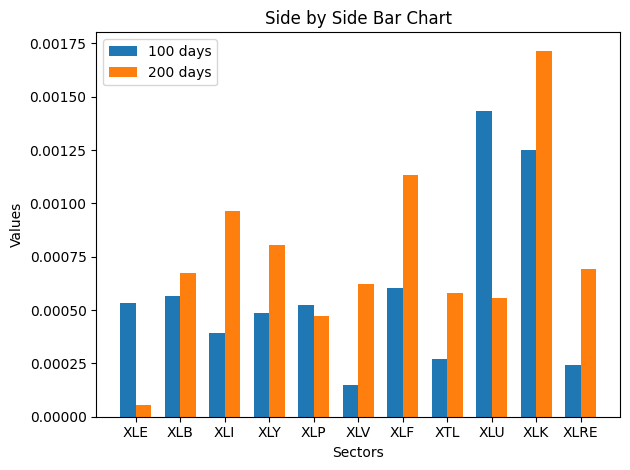

In [15]:
def mean_comparer(d1,d2):
    df_1 = df_close_log_delta.iloc[-d1:,:]
    df_2 = df_close_log_delta.iloc[-d2:,:]

    # Sample data
    sectors = df_1.columns
    values1 = df_1.mean()
    values2 = df_2.mean()

    x = np.arange(len(sectors))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()

    # Create the bars for the first variable
    rects1 = ax.bar(x - width/2, values1, width, label='{} days'.format(d1))

    # Create the bars for the second variable
    rects2 = ax.bar(x + width/2, values2, width, label='{} days'.format(d2))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Sectors')
    ax.set_ylabel('Values')
    ax.set_title('Side by Side Bar Chart')
    ax.set_xticks(x)
    ax.set_xticklabels(sectors)
    ax.legend()

    fig.tight_layout()

    plt.show()

mean_comparer(100,200)

After some exploratory data analysis I began my Markowitz Theory work

<Axes: title={'center': 'Portfolio Risk vs Return'}, xlabel='Risk', ylabel='Return'>

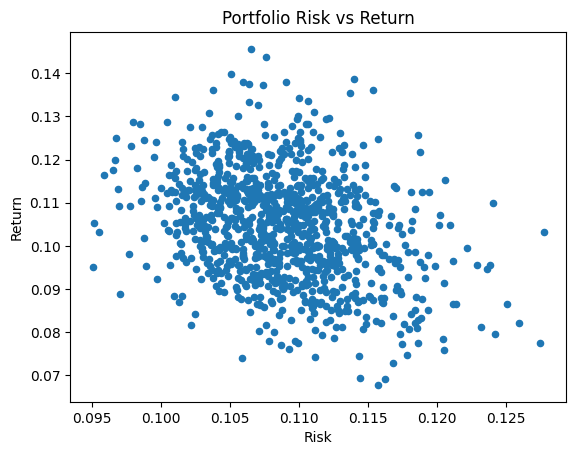

In [16]:
# Create a function to return the portfolio risk and return for a given dataframe by 
# randomly selecting weights for each sector and using Markowitz's formulae 
# to calculate the portfolio risk and return
def mu_sigma_plotter(df):
    R = df.mean()*252
    S = df.cov()*252
    w = np.random.rand(11)
    w /= np.sum(w)
    w = w.reshape(-1,1)
    w_trans = w.T
    R_trans = R.T
    portfolio_risk = np.dot(np.dot(w_trans, S), w)[0,0]
    portfolio_risk = np.sqrt(portfolio_risk)
    portfolio_return = np.dot(R_trans, w)[0]
    # Continuously compound the return
    portfolio_return = np.log1p(portfolio_return)
    return portfolio_risk, portfolio_return
# Create a dataframe to store the risk and return values for 1000 portfolios
risks = []
returns = []
for _ in range(1000):
    risk, return_ = mu_sigma_plotter(new_df(252))
    risks.append(risk)
    returns.append(return_)
df_mark = pd.DataFrame({'Risk':risks,'Return':returns})

# Plot the portfolio risk vs return
df_mark.plot(kind='scatter',x='Risk',y='Return',title='Portfolio Risk vs Return')

This code uses similar mathematical formulae to the previous script, but the random variable is now the target return and the program solves for the weight vector for each return and plots the expected risk vs return on a graph, displaying the Efficient Frontier

In [17]:

def markowitz_weights(df,percent_range):
    risks = []
    returns = []
    weight_vals = []
    for percent in percent_range:
        mu = np.exp(percent)-1
        R = df.mean()*252
        S = df.cov()*252
        R_trans = R.values.reshape(1,-1)
        ones = np.ones(11).reshape(-1,1)
        ones_trans = ones.T
        system = np.block([[2*S,-R.values.reshape(-1,1),-ones],
                            [R_trans,np.zeros((1,1)),np.zeros((1,1))],
                            [ones_trans,np.zeros((1,1)),np.zeros((1,1))]])
        solution = np.linalg.solve(system,np.concatenate([np.zeros(11),[mu,1]]))
        weights = solution[:11]
        portfolio_risk = (np.dot(np.dot(weights.T, S), weights))
        portfolio_risk = np.sqrt(portfolio_risk)
        portfolio_return = np.dot(R.T, weights)
        portfolio_return = np.log1p(portfolio_return)
        portfolio_risk = np.log1p(portfolio_risk)
        risks.append(portfolio_risk)
        returns.append(portfolio_return)
        # Classify the weights to determine the type of portfolio needed 
        # (leverage, short, long, etc.)
        if any(weights>1 for weights in weights):
            weight_vals.append(3)
        elif any(weights==1 for weights in weights):
            weight_vals.append(2)
        elif any(0<weights<1 for weights in weights):
            weight_vals.append(1)
        elif any(weights<0 for weights in weights):
            weight_vals.append(0)
    return risks,returns,weight_vals

percent_range = np.linspace(0.01,1.0,100)
def markowitz_plotter(risks,returns,weight_vals):
    df_optimal = pd.DataFrame({'Risk':risks,'Return':returns,'WeightVals':weight_vals})
    df_optimal['WeightVals'] = df_optimal['WeightVals'].astype('int')
    fig = px.scatter(df_optimal,x='Risk',y='Return',color='WeightVals',color_continuous_scale='viridis',title='Portfolio Risk vs Return')
    return fig

risks,returns,weight_vals = markowitz_weights(new_df(252),percent_range)
markowitz_plotter(risks,returns,weight_vals)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Risk=%{x}<br>Return=%{y}<br>WeightVals=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                         1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                                         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                                         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                                         3, 3, 3, 3]),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([0.09253886, 0.09071743, 0.08899715, 0.08738982, 0.08590786, 0.0845641 ,
                          0.08337168, 0.08234375, 0.08149326, 0.08083261, 0.08037332, 0.08012571,
                          0.08009857, 0.08029886, 0.08073151, 0.08139931, 0.08230284, 0.08344054,
                          0.08480888, 0.08640256, 0.08821481, 0.09023765, 0.09246226, 0.09487919,
                          0.09747869, 0.10025093, 0.10318615, 0.10627485, 0.10950788, 0.11287652,
                          0.11637255, 0.11998824, 0.12371641, 0.12755036, 0.13148392, 0.13551138,
                          0.13962751, 0.14382748, 0.14810686, 0.15246161, 0.156888  , 0.16138263,
                          0.16594236, 0.17056434, 0.17524594, 0.17998474, 0.18477852, 0.18962526,
                          0.19452306, 0.19947021, 0.2044651 , 0.20950627, 0.21459235, 0.21972209,
                          0.22489431, 0.23010793, 0.23536194, 0.24065541, 0.24598747, 0.2513573 ,
                          0.25676413, 0.26220726, 0.26768602, 0.27319979, 0.27874797, 0.28433002,
                          0.28994541, 0.29559366, 0.30127429, 0.30698688, 0.312731  , 0.31850626,
                          0.32431229, 0.33014873, 0.33601524, 0.3419115 , 0.34783719, 0.35379204,
                          0.35977574, 0.36578803, 0.37182865, 0.37789735, 0.38399388, 0.39011802,
                          0.39626954, 0.40244822, 0.40865385, 0.41488623, 0.42114515, 0.42743044,
                          0.4337419 , 0.44007935, 0.44644261, 0.45283152, 0.45924589, 0.46568558,
                          0.47215041, 0.47864022, 0.48515487, 0.4916942 ]),
              'xaxis': 'x',
              'y': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
                          0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24,
                          0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36,
                          0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
                          0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
                          0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72,
                          0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84,
                          0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96,
                          0.97, 0.98, 0.99, 1.  ]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'WeightVals'}},
                             'colorscale': [[0.0, '#440154'], [0.1111111111111111,
                                            '#482878'], [0.2222222222222222,
                                            '#3e4989'], [0.3333333333333333,
                                            '#31688e'], [0.4444444444444444,
                                            '#26828e'], [0.5555555555555556,
                                            '#1f9e89'], [0.6666666666666666,
       

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [25]:
# Use an optimization algorithm to find the optimal portfolio weights, maximizing
# the Sharpe ratio for a given target return
from scipy.optimize import minimize

def sharpe_weights(df, percent):
    mu = np.exp(percent)-1
    R = df.mean()*252
    S = df.cov()*252

    # Define the objective function (negative portfolio return)
    def objective(weights):
        portfolio_return =  np.dot(R.T, weights)
        portfolio_risk = np.sqrt(np.dot(np.dot(weights.T, S), weights))
        return -(portfolio_return)/portfolio_risk

    # Define the constraints
    constraints = (
        {"type": "eq", "fun": lambda weights: np.sum(weights) - 1},  # The sum of the weights is 1
        {'type':'eq','fun': lambda weights: np.dot(R.T,weights) - mu} # The return is equal to the expected return
    )
    bounds = [(0, 1) for _ in range(len(R))]  # Each weight is between 0 and 1

    # Initial guess for the weights (equal distribution)
    init_guess = np.repeat(1/len(R), len(R))

    # Use scipy.optimize.minimize to solve the problem
    result = minimize(objective, init_guess, method="SLSQP", bounds=bounds, constraints=constraints)

    return result.x


def weight_chart(df, percent):
    weights = sharpe_weights(df, percent)
    assets = df.columns

    df_weights = pd.DataFrame({"Asset": assets, "Weight": weights})
    fig = px.bar(df_weights, x="Asset", y="Weight", title=f"Optimal Portfolio Weights for {percent:.2%} Return")
    return fig  

weight_chart(new_df(30), 0.1)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Asset=%{x}<br>Weight=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XTL', 'XLU', 'XLK',
                          'XLRE'], dtype=object),
              'xaxis': 'x',
              'y': array([1.07741547e-01, 1.26571775e-01, 5.06623845e-16, 1.32675853e-16,
                          3.46025133e-01, 1.28081718e-01, 4.09228994e-02, 1.41352281e-02,
                          1.09877349e-01, 1.26644351e-01, 0.00000000e+00]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Optimal Portfolio Weights for 10.00% Return'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Asset'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Weight'}}}
})

In [16]:
pip install dash jupyter-dash

  Using cached dash-2.17.1-py3-none-any.whl.metadata (10 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached ansi2html-1.9.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached MarkupSafe-2.1.5-cp39-cp39-macosx_10_9_universal2.whl.metadata (3.0 kB)
  Using cached charset_normalizer-3.3.2-cp39-cp39

Use Rolling Means to backtest Markowitz algorithm with historical data

In [6]:
# Example usage
window = 60
startpt = 5413
rebalancing_period = 30
target_return = 0.08
rebalancing_frq = rebalancing_period



# Rolling Mean & Cov

# Initialize variables/dictionaries
N = len(df_close_log_delta)

# Create a function to return the rolling mean and covariance given a time window and a starting point
def rolling(window, startpt, rebalancing_period):
    diff = (N - startpt) // rebalancing_period
    dates = df_close_log_delta.index[startpt:startpt + diff * rebalancing_period:rebalancing_period]
    mean = pd.DataFrame(index=dates, columns=df_close_log_delta.columns)
    
    # Create a multi-index DataFrame for covariance
    cov_index = pd.MultiIndex.from_product([dates, df_close_log_delta.columns], names=['Date', 'Stock'])
    cov = pd.DataFrame(index=cov_index, columns=df_close_log_delta.columns)
    
    for i in range(diff):
        if startpt >= len(df_close_log_delta):
            break
        endpt = startpt - window
        window_sp = df_close_log_delta.iloc[endpt:startpt]
        mean.iloc[i] = window_sp.mean()
        
        # Store covariance matrix for each date
        cov.loc[dates[i]] = window_sp.cov().values
        
        startpt = startpt + rebalancing_period

    return mean, cov

rolling_mean, rolling_cov = rolling(window, startpt, rebalancing_period)


    
    
    

In [8]:
# Initialize a new rolling mean and covariance matrix that will be used for 
# the actual monthly returns
rolling_mean_act, rolling_cov_act = rolling(rebalancing_period, startpt, rebalancing_period)

Backtesting function that outputs an equity curve showing the trajectory of an initial investment over a 3 yr span

In [10]:
window = 82
startpt = 5413
rebalancing_period = 30
target_return = 0.1
rebalancing_frq = rebalancing_period
initial_investment = 100

def backtesting_weights(window, startpt, rebalancing_frq, target_return,initial_investment,returns_act_df,weights_df):
    if True:
        # Initialize variables and call the rolling function
        rolling_mean, rolling_cov = rolling(window, startpt, rebalancing_frq)
        equity = initial_investment
        equity_values = [equity]
        weights_list = []
        returns_list = []
        risks_list = []
        dates_list = []  # To store dates for the DataFrame index
        compounding_periods = df_close_log_delta.iloc[startpt:].shape[0]/252

        tindex = rolling_mean.index
        for i in tindex:
            #print(target_return)
            mu = np.log(target_return + 1)
            #print(mu)
            mu = mu * compounding_periods
            #print(mu)
            R = rolling_mean.loc[i].astype(np.float64) * 252
            S = rolling_cov.loc[i]* 252
        
            # Create left-hand side of the system of equations
            X = np.zeros((13,13))
            X[0:11,0:11] = 2*S.values
            X[0:11,11] = -R.to_numpy()
            X[11,0:11] = R.to_numpy()
            X[0:11,12] = -1
            X[12,0:11] = 1
            system = X

            # Create right-hand side of the system of equations
            rhs = np.concatenate([np.zeros(len(R)), [mu, 1.0]])


            if np.linalg.cond(system) > 1e15:
                print(f"System matrix is ill-conditioned in iteration {i}")
                continue
            
            # Solve the system of equations
            solution = np.linalg.solve(system, rhs)
            weights = solution[:len(R)]
            weights_list.append(weights)
            
            weights_df.loc[i,rolling_mean.columns]=weights
            
        

            # Calculate the portfolio risk and return inputs to solve 
            # for the expected return/risk
            target_date = i + pd.Timedelta(days = rebalancing_period)
            t_next_indx = rolling_mean_act.index.get_loc(target_date, method='nearest')
            t_next = rolling_mean_act.index[t_next_indx]
            R_act = rolling_mean_act.loc[t_next].astype(np.float64) * rebalancing_frq 
            S_act = rolling_cov_act.loc[t_next]* rebalancing_frq

            # Solve for the expected return/risk
            portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(S_act, weights)))
            portfolio_return = (np.dot(R_act.values.T, weights))

            returns_list.append(float(portfolio_return))  # Convert to Python float
            risks_list.append(float(portfolio_risk))  # Convert to Python float
            
            # Calculate the equity value
            equity *= (1+portfolio_return)
            equity_values.append(equity)
            
            # Add columns for each of the values
            returns_act_df.loc[t_next,'portfolio_return']  = portfolio_return 
            returns_act_df.loc[t_next,'portfolio_risk']  = portfolio_risk
            returns_act_df.loc[t_next,'equity'] = equity
            
            
        
            
        return returns_act_df,weights_df
        
returns_act_df = pd.DataFrame(index = rolling_mean_act.index)
weights_df = pd.DataFrame(index=rolling_mean_act.index,columns=rolling_mean_act.columns)
returns_act_df,weights_df = backtesting_weights(window,startpt,rebalancing_frq,target_return,initial_investment,returns_act_df,weights_df)
equity = returns_act_df['equity'].figure(kind='line',filename='Equity',title=f'Equity Curve for ${initial_investment}',xTitle='Time',yTitle='Price')
equity

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'rgba(255, 153, 51, 1.0)', 'dash': 'solid', 'shape': 'linear', 'width': 1.3},
              'mode': 'lines',
              'name': 'equity',
              'text': '',
              'type': 'scatter',
              'x': [2021-07-09, 2021-08-20, 2021-10-04, 2021-11-15, 2021-12-29,
                    2022-02-10, 2022-03-25, 2022-05-09, 2022-06-22, 2022-08-04,
                    2022-09-16, 2022-10-28, 2022-12-12, 2023-01-26, 2023-03-10,
                    2023-04-24, 2023-06-06, 2023-07-20, 2023-08-31, 2023-10-13,
                    2023-11-27, 2024-01-10, 2024-02-23, 2024-04-08, 2024-05-20],
              'y': array(['', 103.80859115850593, 101.00089242595328, 108.30793372775157,
                          114.6390199182669, 112.94959188166085, 114.6807450734338,
                          115.75510443536297, 108.26506073271595, 116.72829482052916,
                          116.76154090093, 129.26643019896792, 130.25578660615665,
                          124.02570013740801, 113.66334449437433, 125.67908605466098,
                          127.25211078913983, 130.88009355612826, 128.6295082657007,
                          124.82268341591315, 123.17102432751801, 132.09674662429026,
                          142.224283652524, 146.68896139259348, 154.72851004323502], dtype=object)}],
    'layout': {'legend': {'bgcolor': '#F5F6F9', 'font': {'color': '#4D5663'}},
               'paper_bgcolor': '#F5F6F9',
               'plot_bgcolor': '#F5F6F9',
               'template': '...',
               'title': {'font': {'color': '#4D5663'}, 'text': 'Equity Curve for $100'},
               'xaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Time'},
                         'zerolinecolor': '#E1E5ED'},
               'yaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Price'},
                         'zerolinecolor': '#E1E5ED'}}
})

In [11]:
def optimal_weights(weights_df,month):
    new_df = weights_df.loc[month]
    weights = new_df.figure(kind='bar',filename='Weights',title=f'Optimal Allocation for {month}',xTitle='Sectors',yTitle='Allocation')
    return weights
optimal_weights(weights_df,'2024-01-10')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'rgba(255, 153, 51, 0.6)', 'line': {'color': 'rgba(255, 153, 51, 1.0)', 'width': 1}},
              'name': '2024-01-10 00:00:00',
              'orientation': 'v',
              'text': '',
              'type': 'bar',
              'x': array(['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XTL', 'XLU', 'XLK',
                          'XLRE'], dtype=object),
              'y': array([-0.04069804,  0.03163628,  0.34677116, -0.51590246,  0.36441202,
                           0.44865947,  0.0394662 , -0.02070224, -0.10239477,  0.43708942,
                           0.01166296])}],
    'layout': {'legend': {'bgcolor': '#F5F6F9', 'font': {'color': '#4D5663'}},
               'paper_bgcolor': '#F5F6F9',
               'plot_bgcolor': '#F5F6F9',
               'template': '...',
               'title': {'font': {'color': '#4D5663'}, 'text': 'Optimal Allocation for 2024-01-10'},
               'xaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Sectors'},
                         'zerolinecolor': '#E1E5ED'},
               'yaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Allocation'},
                         'zerolinecolor': '#E1E5ED'}}
})

In [12]:
volatility = returns_act_df['portfolio_risk'].figure(kind='line',filename='Volatility',title=f'Historical Volatility',xTitle='Time',yTitle='Volatility')
volatility

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'rgba(255, 153, 51, 1.0)', 'dash': 'solid', 'shape': 'linear', 'width': 1.3},
              'mode': 'lines',
              'name': 'portfolio_risk',
              'text': '',
              'type': 'scatter',
              'x': [2021-07-09, 2021-08-20, 2021-10-04, 2021-11-15, 2021-12-29,
                    2022-02-10, 2022-03-25, 2022-05-09, 2022-06-22, 2022-08-04,
                    2022-09-16, 2022-10-28, 2022-12-12, 2023-01-26, 2023-03-10,
                    2023-04-24, 2023-06-06, 2023-07-20, 2023-08-31, 2023-10-13,
                    2023-11-27, 2024-01-10, 2024-02-23, 2024-04-08, 2024-05-20],
              'y': array(['', 0.03050069466503159, 0.03651637156415827, 0.037494147698406415,
                          0.04430044907387452, 0.036224838954582374, 0.05425850057654847,
                          0.06555609521114926, 0.08404707823850023, 0.06395831820222826,
                          0.050334818136687116, 0.080906666862411, 0.046426417987290164,
                          0.05008982208008902, 0.04293264561105264, 0.04844415546023844,
                          0.04061300578449402, 0.041104135267146014, 0.034970332623627406,
                          0.03542356742084524, 0.050279219647333215, 0.047964489874100284,
                          0.03321472390458241, 0.029463617635685547, 0.026182438315149676],
                         dtype=object)}],
    'layout': {'legend': {'bgcolor': '#F5F6F9', 'font': {'color': '#4D5663'}},
               'paper_bgcolor': '#F5F6F9',
               'plot_bgcolor': '#F5F6F9',
               'template': '...',
               'title': {'font': {'color': '#4D5663'}, 'text': 'Historical Volatility'},
               'xaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Time'},
                         'zerolinecolor': '#E1E5ED'},
               'yaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Volatility'},
                         'zerolinecolor': '#E1E5ED'}}
})

In [13]:
returns = returns_act_df['portfolio_return'].figure(kind='line',filename='Return',title=f'Historical Returns',xTitle='Time',yTitle='Returns')
returns


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'rgba(255, 153, 51, 1.0)', 'dash': 'solid', 'shape': 'linear', 'width': 1.3},
              'mode': 'lines',
              'name': 'portfolio_return',
              'text': '',
              'type': 'scatter',
              'x': [2021-07-09, 2021-08-20, 2021-10-04, 2021-11-15, 2021-12-29,
                    2022-02-10, 2022-03-25, 2022-05-09, 2022-06-22, 2022-08-04,
                    2022-09-16, 2022-10-28, 2022-12-12, 2023-01-26, 2023-03-10,
                    2023-04-24, 2023-06-06, 2023-07-20, 2023-08-31, 2023-10-13,
                    2023-11-27, 2024-01-10, 2024-02-23, 2024-04-08, 2024-05-20],
              'y': array(['', 0.03808591158505936, -0.02704688216282185, 0.07234630433741267,
                          0.05845450072410642, -0.01473693719477482, 0.015326776865087788,
                          0.009368262834717603, -0.06470594743257668, 0.07817142511661443,
                          0.00028481595188171495, 0.10709767275723162, 0.00765362210177768,
                          -0.04782963299424088, -0.08355006770010757, 0.10571342602787268,
                          0.012516201253999524, 0.02851019715500092, -0.017195779963760326,
                          -0.02959526862159871, -0.013232042792188276, 0.07246608807147929,
                          0.07666757347959888, 0.03139181035340897, 0.026790942229884512],
                         dtype=object)}],
    'layout': {'legend': {'bgcolor': '#F5F6F9', 'font': {'color': '#4D5663'}},
               'paper_bgcolor': '#F5F6F9',
               'plot_bgcolor': '#F5F6F9',
               'template': '...',
               'title': {'font': {'color': '#4D5663'}, 'text': 'Historical Returns'},
               'xaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Time'},
                         'zerolinecolor': '#E1E5ED'},
               'yaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Returns'},
                         'zerolinecolor': '#E1E5ED'}}
})

In [14]:
sharpe = returns_act_df['portfolio_return']/returns_act_df['portfolio_risk']
rar = sharpe.figure(kind='bar',filename='sharpe',title='Actual Sharpe Ratio',xTitle='Time',yTitle='Sharpe Ratio')
rar

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'rgba(255, 153, 51, 0.6)', 'line': {'color': 'rgba(255, 153, 51, 1.0)', 'width': 1}},
              'name': 'None',
              'orientation': 'v',
              'text': '',
              'type': 'bar',
              'x': [2021-07-09, 2021-08-20, 2021-10-04, 2021-11-15, 2021-12-29,
                    2022-02-10, 2022-03-25, 2022-05-09, 2022-06-22, 2022-08-04,
                    2022-09-16, 2022-10-28, 2022-12-12, 2023-01-26, 2023-03-10,
                    2023-04-24, 2023-06-06, 2023-07-20, 2023-08-31, 2023-10-13,
                    2023-11-27, 2024-01-10, 2024-02-23, 2024-04-08, 2024-05-20],
              'y': array(['', 1.2486899725836103, -0.7406782493518344, 1.9295359083595744,
                          1.3195013131047246, -0.4068185703531092, 0.28247697046962456,
                          0.14290452786340335, -0.769877416190016, 1.2222245255018447,
                          0.00565842815023749, 1.3237187602767118, 0.1648548915376792,
                          -0.9548772786169154, -1.9460731224678671, 2.182170893961382,
                          0.3081820961594079, 0.69360897558618, -0.49172480424570353,
                          -0.8354683273425244, -0.2631712044260038, 1.5108278699865691,
                          2.3082405772766807, 1.0654431761084235, 1.0232409184893503],
                         dtype=object)}],
    'layout': {'legend': {'bgcolor': '#F5F6F9', 'font': {'color': '#4D5663'}},
               'paper_bgcolor': '#F5F6F9',
               'plot_bgcolor': '#F5F6F9',
               'template': '...',
               'title': {'font': {'color': '#4D5663'}, 'text': 'Actual Sharpe Ratio'},
               'xaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Time'},
                         'zerolinecolor': '#E1E5ED'},
               'yaxis': {'gridcolor': '#E1E5ED',
                         'showgrid': True,
                         'tickfont': {'color': '#4D5663'},
                         'title': {'font': {'color': '#4D5663'}, 'text': 'Sharpe Ratio'},
                         'zerolinecolor': '#E1E5ED'}}
})

In [15]:
def stacked_bar_plot(weights_df):
    weights_df = weights_df.reset_index()
    weights_df = weights_df.melt(id_vars='time', var_name='Stock', value_name='Weight')
    #print(weights_df)
    fig = px.bar(weights_df, x='time', y='Weight', color='Stock', barmode='stack', title='Change in Sector Allocation', labels={'Date': 'Date', 'Weight': 'Weight', 'Stock': 'Stock'})
    return fig
stacked_bar_plot(weights_df)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Stock=XLE<br>time=%{x}<br>Weight=%{y}<extra></extra>',
              'legendgroup': 'XLE',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'XLE',
              'offsetgroup': 'XLE',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([datetime.datetime(2021, 7, 9, 0, 0),
                          datetime.datetime(2021, 8, 20, 0, 0),
                          datetime.datetime(2021, 10, 4, 0, 0),
                          datetime.datetime(2021, 11, 15, 0, 0),
                          datetime.datetime(2021, 12, 29, 0, 0),
                          datetime.datetime(2022, 2, 10, 0, 0),
                          datetime.datetime(2022, 3, 25, 0, 0),
                          datetime.datetime(2022, 5, 9, 0, 0),
                          datetime.datetime(2022, 6, 22, 0, 0),
                          datetime.datetime(2022, 8, 4, 0, 0),
                          datetime.datetime(2022, 9, 16, 0, 0),
                          datetime.datetime(2022, 10, 28, 0, 0),
                          datetime.datetime(2022, 12, 12, 0, 0),
                          datetime.datetime(2023, 1, 26, 0, 0),
                          datetime.datetime(2023, 3, 10, 0, 0),
                          datetime.datetime(2023, 4, 24, 0, 0),
                          datetime.datetime(2023, 6, 6, 0, 0),
                          datetime.datetime(2023, 7, 20, 0, 0),
                          datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 10, 13, 0, 0),
                          datetime.datetime(2023, 11, 27, 0, 0),
                          datetime.datetime(2024, 1, 10, 0, 0),
                          datetime.datetime(2024, 2, 23, 0, 0),
                          datetime.datetime(2024, 4, 8, 0, 0),
                          datetime.datetime(2024, 5, 20, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([0.043598262261545714, -0.05814036242604745, 0.038302717964433325,
                          0.11903419213029975, 0.10715991635024327, 0.13504865160333027,
                          0.21130543899159898, 0.2650034935659705, 0.051596070878633125,
                          0.047586065111059894, 0.09073287377936867, 0.11448093965325642,
                          0.14379930951480752, 0.1205891505593781, -0.11097133547875002,
                          -0.001562776484729099, 0.007623418412909616, 0.03534180742361687,
                          0.2954258068081669, 0.41533961062418623, 0.07519780858909159,
                          -0.040698038262644766, 0.2031411501980195, 0.2099326594531386,
                          0.11887913750543591], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Stock=XLB<br>time=%{x}<br>Weight=%{y}<extra></extra>',
              'legendgroup': 'XLB',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'XLB',
              'offsetgroup': 'XLB',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([datetime.datetime(2021, 7, 9, 0, 0),
                          datetime.datetime(2021, 8, 20, 0, 0),
                          datetime.datetime(2021, 10, 4, 0, 0),
                          datetime.datetime(2021, 11, 15, 0, 0),
                          datetime.datetime(2021, 12, 29, 0, 0),
                          datetime.datetime(2022, 2, 10, 0, 0),
                          datetime.datetime(2022, 3, 25, 0, 0),
                          datetime.datetime(2022, 5, 9, 0, 0),
                          datetime.datetime(2022, 6, 22, 0, 0),
                          datetime.datetime(2022, 8, 4, 0, 0),
                          d

Made Dashboard that includes an equity curve, optimal weight allocation, and stacked bar chart that can be altered by multiple inputs

In [16]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go
import pandas as pd


app = Dash(__name__)

app.layout = html.Div([
    html.H1('Backtesting Equity Curve & Weights', style={'text-align': 'center', 'color': 'white'}),
    
    dcc.Dropdown(id='lookback_window',
                 options=[
                     {'label': '1 Month', 'value': 30},
                     {'label': '1 Quarter', 'value': 63},
                     {'label': '6 months', 'value': 126},
                     {'label': '1 Year', 'value': 252}],
                 multi=False,
                 value=252,
                 style={'width': '40%', 'margin': 'auto'}
                ),
    dcc.Input(id='initial_investment',
              type='number',
              placeholder='Initial Investment ($)',
              value=100,
              style={'margin': '10px auto', 'display': 'block'}),
    dcc.Input(id='target_return',
              type='number',
              placeholder='Target Return (Decimal)',
              value=0.1,
              style={'margin': '10px auto', 'display': 'block'}),
    
    html.Br(),
    html.Div(id='click-instruction', children='Click on a point in the equity curve to see allocations', 
             style={'text-align': 'right', 'color': 'white'}),
    dcc.Graph(id='equity', figure={}),
    dcc.Graph(id='allocations', figure={}),
    dcc.Graph(id='stacked_bar', figure={})
])

@app.callback(
    Output(component_id='equity', component_property='figure'),
    Output(component_id='allocations', component_property='figure'),
    Output(component_id='stacked_bar', component_property='figure'),
    Input(component_id='lookback_window', component_property='value'),
    Input(component_id='initial_investment', component_property='value'),
    Input(component_id='target_return', component_property='value'),
    Input(component_id='equity', component_property='clickData')
)
def update_graph_v3(lookback_window, initial_investment, target_return,clickData):
    if initial_investment is None:
        return go.Figure()#go.Figure()  # Return an empty figure if expected_return is not provided
    
    returns_df,weights_df_2 = backtesting_weights(lookback_window, startpt, rebalancing_frq, target_return,initial_investment,returns_act_df,weights_df)
    # Assuming weight_chart is defined and returns a Plotly figure
    equity = returns_df['equity'].figure(kind='line',filename='Equity',title=f'Equity Curve for ${initial_investment}',xTitle='Time',yTitle='Price')
    equity.update_layout(title=f'Equity Curve for ${initial_investment}')

    stacked_bar = stacked_bar_plot(weights_df_2)
    stacked_bar.update_layout(title=f'Change in Sector Allocation for {target_return:.2%} Return')
    
    if clickData is None:
        # If no point is clicked, show the latest allocation
         allocations = optimal_weights(weights_df_2,weights_df_2.index[-1])
         allocations.update_layout(title=f'Optimal Allocation for {weights_df_2.index[-1]}')
    else:
        # Get the date of the clicked point
        selected_date = pd.to_datetime(clickData['points'][0]['x'])
        allocations = optimal_weights(weights_df_2,selected_date)
        allocations.update_layout(title=f'Optimal Allocation for {selected_date}')
       


    return equity,allocations,stacked_bar

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

/Users/tanaymehrish/Documents/GitHub/portfolio-optimization/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0

Made an optimizationn function that maximizes the final equity value by finding the optimal lookback window

In [17]:
from scipy.optimize import minimize

def optimal_lookback(startpt, target_return, init_guess):
    def objective(lookback_window):
        lookback_window = int(lookback_window[0])
        returns_df,weights_df_2 = backtesting_weights(lookback_window, startpt, rebalancing_frq, target_return,initial_investment,returns_act_df,weights_df)
        equity = returns_df['equity']
        return -equity.iloc[-1]

    bounds = [(1, 252*5)]  # For example, if you want the lookback window to be between 1 and 5 years
    result = minimize(objective, init_guess, method="Nelder-Mead", bounds=bounds)
    return result.fun, result.x

def outer_objective(init_guess):
    _, x = optimal_lookback(5413, 0.1, init_guess)
    return -x

init_guess_range = [(1, 252*5)]
outer_result = minimize(outer_objective, [70], method="Nelder-Mead", bounds=init_guess_range)

best_init_guess = outer_result.x
inner_result = optimal_lookback(5413, 0.1, best_init_guess)

print(inner_result)

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0

(-154.72851004323502, array([82.95343666]))


/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/var/folders/8k/t0b98hb54_l_v_q20pc0qs6h0000gn/T/ipykernel_54125/2653260515.py:59: FutureWarning:

Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

